<a href="https://colab.research.google.com/github/Nefarian1/STQD6324-Data-Management-work/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STQD6324
#assignment01
#P136922 PAN ZHANGYU

#diabetes.csv
# From： https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
#Information about dataset attributes -

#Pregnancies: To express the Number of pregnancies

#Glucose: To express the Glucose level in blood

#BloodPressure: To express the Blood pressure measurement

#SkinThickness: To express the thickness of the skin

#Insulin: To express the Insulin level in blood

#BMI: To express the Body mass index

#DiabetesPedigreeFunction: To express the Diabetes percentage

#Age: To express the age

#Outcome: To express the final result 1 is Yes and 0 is No

In [1]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:

missing_values = df.isnull().sum()
print("Number of missing values:")
print(missing_values)


df_cleaned = df.dropna()

#  Alternatively, fill missing values ​​with the mean (或者，用平均值填充缺失值)
# df_cleaned = df.fillna(df.mean())

print("Data after processing missing values:")
print(df_cleaned.head())


Number of missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Data after processing missing values:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  


In [3]:

mean = df_cleaned.mean()
std = df_cleaned.std()
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

outliers = (df_cleaned < lower_bound) | (df_cleaned > upper_bound)

outliers_rows = outliers.any(axis=1)

df_cleaned = df_cleaned[~outliers_rows]

print("Data after processing outliers:")
print(df_cleaned.head())


Data after processing outliers:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
5            5      116             74              0        0  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0  


#This graph shows the distribution of glucose levels.

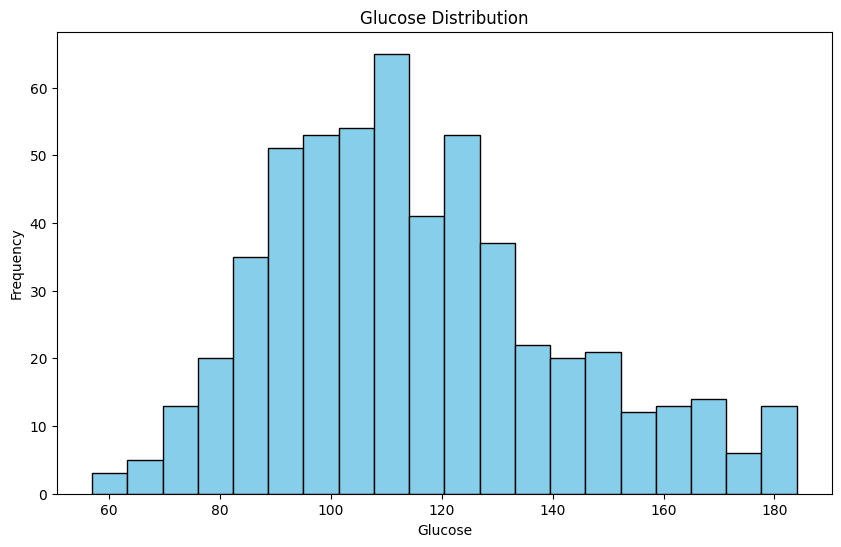

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(df_cleaned['Glucose'], bins=20, color='skyblue', edgecolor='black')

plt.title('Glucose Distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')

plt.show()


#This figure shows that BIM data is mostly concentrated among young people, with most BIM levels ranging from 20 to 45.

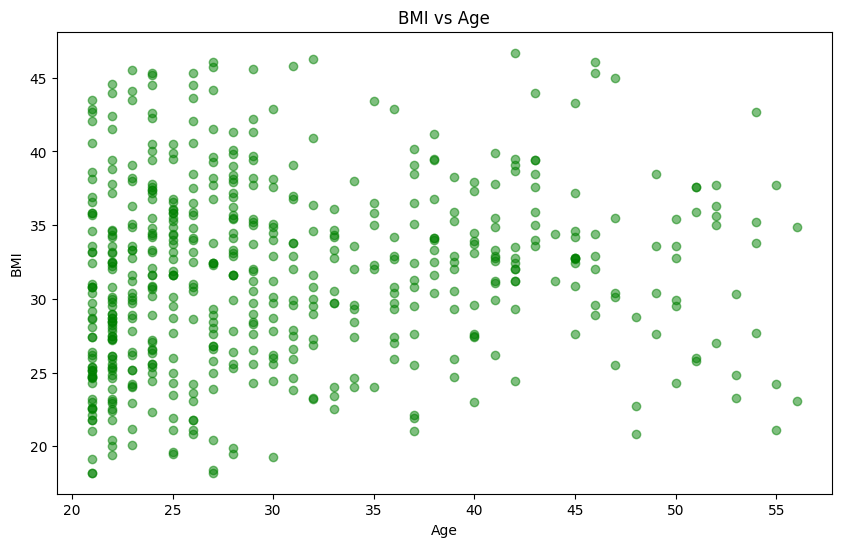

In [5]:

plt.figure(figsize=(10, 6))

plt.scatter(df_cleaned['Age'], df_cleaned['BMI'], color='green', alpha=0.5)

plt.title('BMI vs Age')
plt.xlabel('Age')
plt.ylabel('BMI')

plt.show()


#Outcome: To express the final result 1 is Yes and 0 is No
#It can be seen that patients with diabetes have higher glucose levels, and the values in the scattered points are higher.

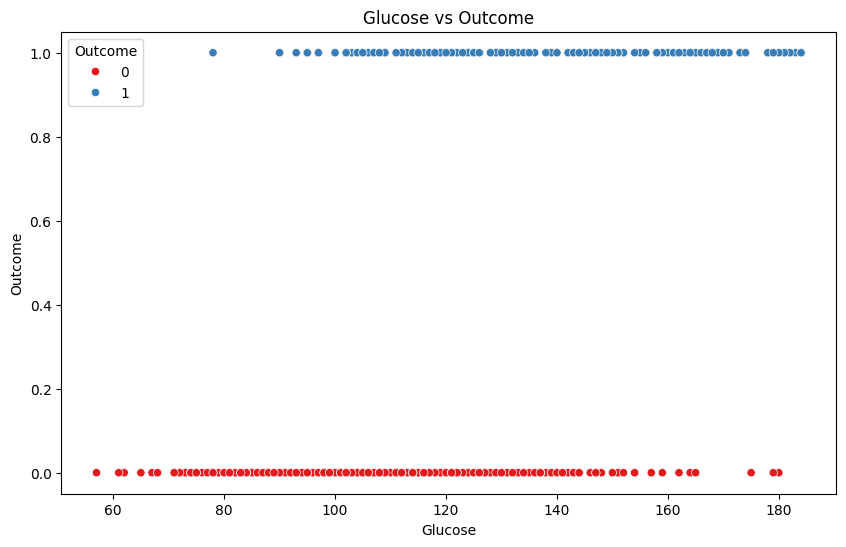

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_cleaned, x='Glucose', y='Outcome', hue='Outcome', palette='Set1')

plt.title('Glucose vs Outcome')
plt.xlabel('Glucose')
plt.ylabel('Outcome')

plt.show()


#This is how to make a more intuitive picture.


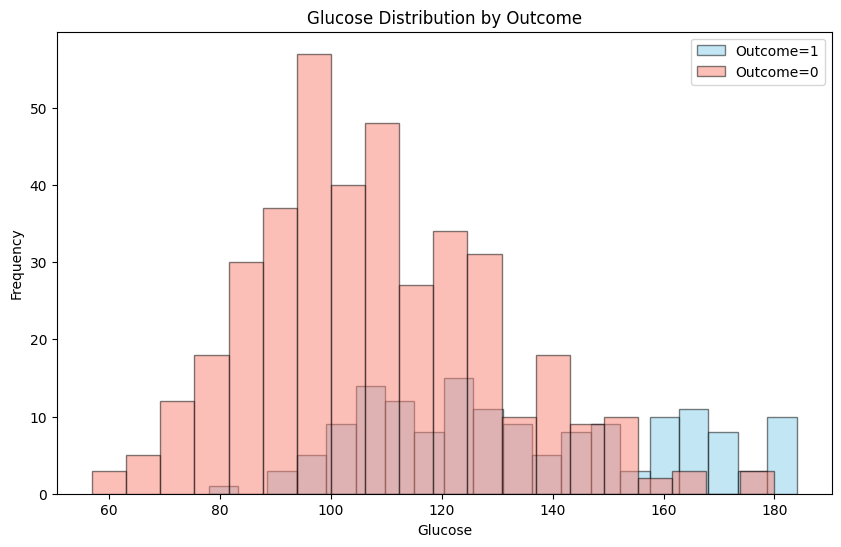

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(df_cleaned[df_cleaned['Outcome'] == 1]['Glucose'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Outcome=1')

plt.hist(df_cleaned[df_cleaned['Outcome'] == 0]['Glucose'], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='Outcome=0')

plt.title('Glucose Distribution by Outcome')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.legend()

plt.show()


#This graph shows that younger people have less diabetes than older people.

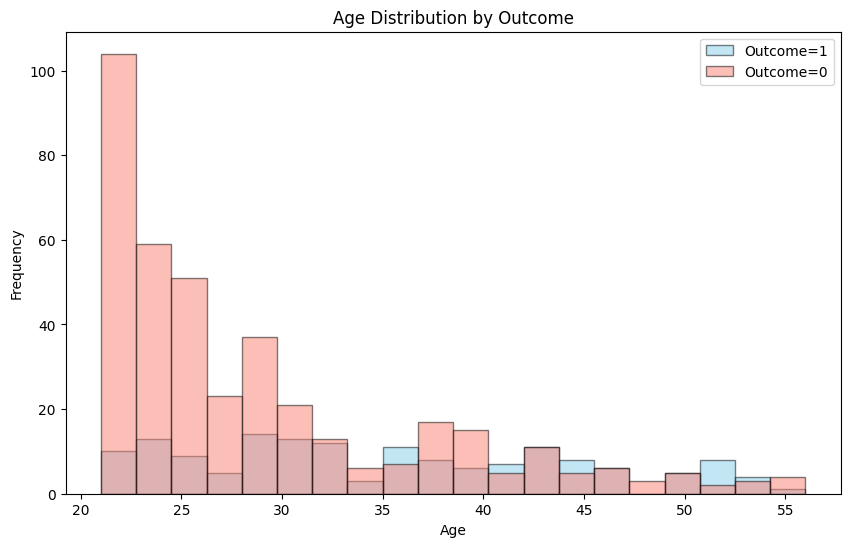

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(df_cleaned[df_cleaned['Outcome'] == 1]['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='Outcome=1')

plt.hist(df_cleaned[df_cleaned['Outcome'] == 0]['Age'], bins=20, color='salmon', edgecolor='black', alpha=0.5, label='Outcome=0')

plt.title('Age Distribution by Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.show()
